In [470]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [471]:
products = pd.read_csv("products_j_cl.csv")
brands = pd.read_csv("brands_j_cl.csv")
orders = pd.read_csv("orders_j_cl.csv")
orderlines = pd.read_csv("orderlines_j_cl.csv")

In [472]:
products_sabrina = products.copy()

In [473]:
brands_sabrina = brands.copy()

In [474]:
orders_sabrina = orders.copy()

In [475]:
orderlines_sabrina = orderlines.copy()

<h1><strong>PREPARATION DATA SET AND DATA FRAMES</strong><h1>

<strong>Create categories products<strong>

In [476]:
products_sabrina.head()

,sku,name,desc,price,max_price_orderlines
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,NaN
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,NaN
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,NaN
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,NaN
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,NaN


In [477]:
Mac = (r'^Apple Mac|^Apple iMac|^New Mac|^IMAC desktop|^desktop computer')

Accessories = (r'kensington|silicone|belt|deportiva|alarm|flypad|netcam|dell|celly|ik multimedia|glucÃ­metro|u2913wm dell 29 "ultrasharp fhd ips|scanner|netstream|webcam|bookarc|maleta|robot|blood pressure|netgear satellite|led|bracelet|gloves|polaroid|thermometer|home music|living colors|pocket|game capture|laser|scale|detector|gopro|pointer|riser|stylus|cleaner|case|fairbrush|backpack|casing|briefcase|camera|headphones|headset|keyboard|microphone|minidp|monitor|mouse|pen|pencil|screen protector|sleeve|speaker|stand|star wars|station|support|thermostat|apple tv|drone|lamp|p2418d|radiator|stabilizer|keypad|bag|cover')

iPad = (r'ipad')

iPhone = (r'iphone')

Licenses_and_waranties = (r'siri|parallels desktop|quarkpress|microsoft office|repair|adobe|applecare|license|protection|software|installation')

Open_or_refurbished = (r'^\(OPEN\)|^Open|Like New|refurbished|used|second hand')

Other_devices = (r'tablet|wacom intuos|ninebot|wacom cintiq|wacom mobilestudio')

Parts = (r'siren|devolo|hirise|hoco|startech|access point|replacement|bike|ifixit|bell|sonar fish|linksys|newertech|control|photo|hotspot|sonos|locator keys|alarm system|accelsior|video capture|smart plug|spare ball|calibrator|locator bluetooth|security|devolo dlan 500av|router|airport|lock|adapter|battery|box|bulb|cable|charger|cleanser|converter|dimmer|displayport|dock|kit|lightstrips|rack|raid|sensor|sonnet|allegro|startech hdmi|subwoofer|superdrive|switch|usb-c to|glass|charging|dock|hub|powercube|tools|ups|wireless base|ports|lightning|powerhouse base|nonda mini|satechi multiport|adapatdor')

Storage = (r'seagate|sshd|(wd red)|(drobo b810i iscsi san 8 bays)|(western digital)|(owc mercury)|(external enclosure)|thunderbolt|4tb|sdhc|samsung pro|sdhc|(lexar premium sdhc)|(newertech ministack)|(electra 6g ssd 960gb)|jumpdrive|passport|(wd blue 500gb)|nas|20tb|(256gb samsung)|(512gb samsung ssd)|3tb|8tb|capsule|datatraveler|(disk 500gb)|(hard disk)|(hard drive)|memory|qnap|rackstation|rugged|sandisk|samsung|server|transcend|crucial|cloud|(storage unit)|pendrive|hypedrive|ssynology')

iPod = (r'ipod')

Smartwatch = (r'withings|watch|fitbit')


products_sabrina = products_sabrina.assign(category = '')

condlist = [
            products_sabrina.name.str.contains(Open_or_refurbished, case=False, regex = True),
            (((products_sabrina.sku.str[0:3] == 'APP')|(products_sabrina.sku.str[0:3] == 'PAC')) & (products_sabrina.name.str.contains(Mac, case=False, regex = True))),
            products_sabrina.name.str.contains(Smartwatch, case=False, regex = True),
            ((products_sabrina.name.str.contains(Parts, case=False, regex = True)) & (products_sabrina.price < 100)),
            products_sabrina.name.str.contains(Parts, case=False, regex = True),
            ((products_sabrina.name.str.contains(Accessories, case=False, regex = True)) & (products_sabrina.price < 200)),
            products_sabrina.name.str.contains(Accessories, case=False, regex = True),
            products_sabrina.name.str.contains(Licenses_and_waranties, case=False, regex = True),
            products_sabrina.name.str.contains(Other_devices, case=False, regex = True),
            ((products_sabrina.name.str.contains(Storage, case=False, regex = True)) & (products_sabrina.price < 500)),
            products_sabrina.name.str.contains(Storage, case=False, regex = True),
            products_sabrina.name.str.contains(iPad, case=False, regex = True),
            products_sabrina.name.str.contains(iPhone, case=False, regex = True), 
            
            products_sabrina.name.str.contains(iPod, case=False, regex = True)
]

choicelist = [ 
            'Open or refurbished',
            'Mac',
            'Smartwatch',
            'Cheap parts',
            'Expensive parts',
            'Cheap Accessories',
            'Expensive Accessories',
            'Licenses_and_waranties',
            'Other_devices',
            'Cheap Storage',
            'Expensive storage',
            'iPad',
            'iPhone',
            
            'iPod'
]

products_sabrina.category = np.select(condlist, choicelist, default='Uncategorized')

/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [478]:
products_sabrina=products_sabrina.drop(['max_price_orderlines'],axis=1)

<strong>Create discount products/orderlines<strong>

In [479]:
orderlines_products_sabrina =orderlines_sabrina.merge(products_sabrina,how='left')

In [480]:
orderlines_products_sabrina=orderlines_products_sabrina.drop(['product_id','check_orders','id'],axis=1)

In [481]:
orderlines_products_sabrina['Discount'] =(orderlines_products_sabrina['unit_price']*100)/orderlines_products_sabrina['price']

In [482]:
orderlines_products_sabrina['Discount']= 100-(orderlines_products_sabrina['Discount']).round(decimals=0)

In [484]:
orderlines_products_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,category,Discount
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,Cheap parts,46.00
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,Expensive parts,7.00
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,Expensive parts,32.00
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,Cheap Storage,13.00
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,Cheap Accessories,21.00


<strong>Create discount range products/orderlines<strong>

In [485]:
orderlines_products_sabrina = orderlines_products_sabrina.assign(discount_range = '')

condlist = [
            ((orderlines_products_sabrina.Discount > -1) & (orderlines_products_sabrina.Discount <1 )),
            (orderlines_products_sabrina.Discount <= 10),
            (orderlines_products_sabrina.Discount <=20),
            (orderlines_products_sabrina.Discount <=50),
            (orderlines_products_sabrina.Discount >50)
]

choicelist = [
            
            '0%',
            '1% -10%',
            '11% -20%',
            '21% -50%',
            'Over 50%'
            
]

orderlines_products_sabrina.discount_range = np.select(condlist, choicelist, default='-')

In [486]:
orderlines_products_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,category,Discount,discount_range
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,Cheap parts,46.00,21% -50%
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,Expensive parts,7.00,1% -10%
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,Expensive parts,32.00,21% -50%
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,Cheap Storage,13.00,11% -20%
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,Cheap Accessories,21.00,21% -50%


<strong>Merging orderlines_products_sabrina with orders for state <strong>

In [487]:
orderlines_products_sabrina.merge(orders_sabrina, how='left', left_on='id_order', right_on='order_id')

,id_order,product_quantity,sku,unit_price,date,total_price,name,desc,price,category,Discount,discount_range,order_id,created_date,total_paid,state,check_orders
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,Cheap parts,46.00,21% -50%,299539,2017-01-01 00:07:19,18.99,Shopping Basket,True
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,Expensive parts,7.00,1% -10%,299540,2017-01-01 00:19:45,399.00,Shopping Basket,True
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,Expensive parts,32.00,21% -50%,299541,2017-01-01 00:20:57,474.05,Shopping Basket,True
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,Cheap Storage,13.00,11% -20%,299542,2017-01-01 00:51:40,68.39,Shopping Basket,True
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,Cheap Accessories,21.00,21% -50%,299543,2017-01-01 01:06:38,23.74,Shopping Basket,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293738,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,Cheap Accessories,14.00,11% -20%,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
293739,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,Expensive parts,34.00,21% -50%,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
293740,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,Cheap parts,60.00,Over 50%,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True
293741,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,Cheap Accessories,33.00,21% -50%,527388,2018-03-14 13:51:59,34.98,Shopping Basket,True


In [488]:
orderlines_products_orders_sabrina=orderlines_products_sabrina.merge(orders_sabrina, how='left', left_on='id_order', right_on='order_id')

In [489]:
orderlines_products_orders_sabrina=orderlines_products_orders_sabrina.drop(['check_orders','created_date','order_id','desc'],axis=1)

In [490]:
orderlines_products_orders_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,price,category,Discount,discount_range,total_paid,state
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,Cheap parts,46.00,21% -50%,18.99,Shopping Basket
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",429.00,Expensive parts,7.00,1% -10%,399.00,Shopping Basket
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,699.00,Expensive parts,32.00,21% -50%,474.05,Shopping Basket
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",79.00,Cheap Storage,13.00,11% -20%,68.39,Shopping Basket
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,29.90,Cheap Accessories,21.00,21% -50%,23.74,Shopping Basket


<strong>Adjust date <strong>

In [491]:
orderlines_products_orders_sabrina['date']=pd.to_datetime(orderlines_products_orders_sabrina['date'])

In [492]:
orderlines_products_orders_sabrina =orderlines_products_orders_sabrina.assign(year = orderlines_products_orders_sabrina['date'].dt.strftime('%Y'))

In [493]:
orderlines_products_orders_sabrina=orderlines_products_orders_sabrina.assign(month = orderlines_products_orders_sabrina['date'].dt.strftime('%b'))

In [494]:
orderlines_products_orders_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,price,category,Discount,discount_range,total_paid,state,year,month
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,Cheap parts,46.00,21% -50%,18.99,Shopping Basket,2017,Jan
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",429.00,Expensive parts,7.00,1% -10%,399.00,Shopping Basket,2017,Jan
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,699.00,Expensive parts,32.00,21% -50%,474.05,Shopping Basket,2017,Jan
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",79.00,Cheap Storage,13.00,11% -20%,68.39,Shopping Basket,2017,Jan
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,29.90,Cheap Accessories,21.00,21% -50%,23.74,Shopping Basket,2017,Jan


<strong>Create revenue column <strong>

In [495]:
orderlines_products_orders_sabrina['price']*orderlines_products_orders_sabrina['product_quantity']

0         34.99
1        429.00
2        699.00
3         79.00
4         29.90
          ...  
293738    49.95
293739   215.98
293740    50.00
293741    29.99
293742    35.00
Length: 293743, dtype: float64

In [496]:
orderlines_products_orders_sabrina['revenue']=orderlines_products_orders_sabrina['price']*orderlines_products_orders_sabrina['product_quantity']

In [497]:
orderlines_products_orders_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_price,name,price,category,Discount,discount_range,total_paid,state,year,month,revenue
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,Cheap parts,46.00,21% -50%,18.99,Shopping Basket,2017,Jan,34.99
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",429.00,Expensive parts,7.00,1% -10%,399.00,Shopping Basket,2017,Jan,429.00
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,699.00,Expensive parts,32.00,21% -50%,474.05,Shopping Basket,2017,Jan,699.00
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",79.00,Cheap Storage,13.00,11% -20%,68.39,Shopping Basket,2017,Jan,79.00
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,29.90,Cheap Accessories,21.00,21% -50%,23.74,Shopping Basket,2017,Jan,29.90


<h1>Considerations:</h1>

<h>1.Company revenue comes from which category<br> 2.How many orders have the top 5 categories?<br>3.How many orders come from other categories?And in which discount range are?<br> 4.Which discount range segment brings more revenue? <br> 5.Is there a correlation between discount and number of orders?  </h> 

<h><strong>1.Company revenue comes from which category</strong></h>

In [498]:
company_revenue=orderlines_products_orders_sabrina.query('state=="Completed"')

In [499]:
company_revenue=company_revenue.query('year=="2017"')

In [500]:
company_revenue=company_revenue[['category','revenue']]

In [501]:
company_revenue=company_revenue.groupby('category').revenue.sum().sort_values(ascending=False).reset_index()

In [502]:
pd.options.display.float_format = '{:.2f}'.format

In [503]:
company_revenue=company_revenue.sort_values(by='revenue',ascending=False)

In [504]:
company_revenue

,category,revenue
0,Mac,5234911.76
1,Cheap Storage,1765580.66
2,iPhone,1210940.98
3,Expensive parts,982994.11
4,Expensive Accessories,871944.40
5,Cheap Accessories,784037.06
6,Open or refurbished,758017.46
7,Cheap parts,561850.87
8,Expensive storage,449456.78
9,iPad,385333.97


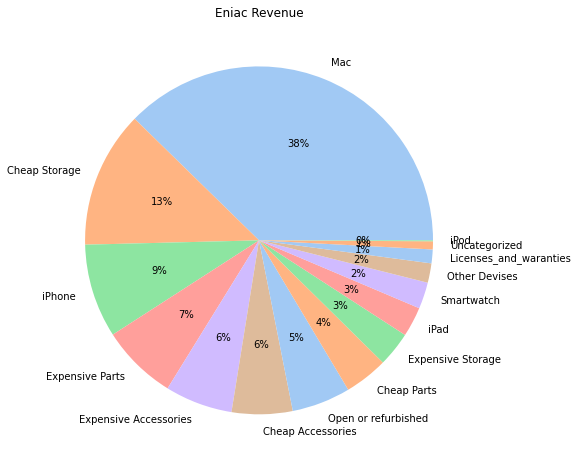

In [506]:
plt.subplots(figsize=(20, 8))
labels = ['Mac', 'Cheap Storage', 'iPhone','Expensive Parts','Expensive Accessories','Cheap Accessories','Open or refurbished','Cheap Parts','Expensive Storage', 'iPad','Smartwatch','Other Devises','Licenses_and_waranties','Uncategorized','iPod']
colors = sns.color_palette('pastel')[0:6]
plt.pie(company_revenue.revenue, labels=labels,colors = colors, autopct='%.0f%%')
plt.title('Eniac Revenue') 
plt.show()
plt.show()

<h><strong>2.How many orders have the top 5 categories?</strong></h>

In [507]:
discount_range_orders_top_5_categories=orderlines_products_orders_sabrina.query('state=="Completed"')

In [508]:
discount_range_orders_top_5_categories=discount_range_orders_top_5_categories.query('year=="2017"')

In [509]:
discount_range_orders_top_5_categories=discount_range_orders_top_5_categories.query("(category=='Mac')|(category=='Cheap Storage')|(category=='iPhone')|(category=='Expensive parts')|(category=='Expensive Accessories')")

In [510]:
discount_range_orders_top_5_categories=discount_range_orders_top_5_categories.groupby(['discount_range','category']).id_order.count().reset_index()

In [511]:
discount_range_orders_top_5_categories

,discount_range,category,id_order
0,-,Expensive Accessories,140
1,-,Expensive parts,261
2,-,iPhone,120
3,0%,Cheap Storage,283
4,0%,Expensive Accessories,36
5,0%,Expensive parts,99
6,0%,Mac,33
7,0%,iPhone,152
8,1% -10%,Cheap Storage,2954
9,1% -10%,Expensive Accessories,525


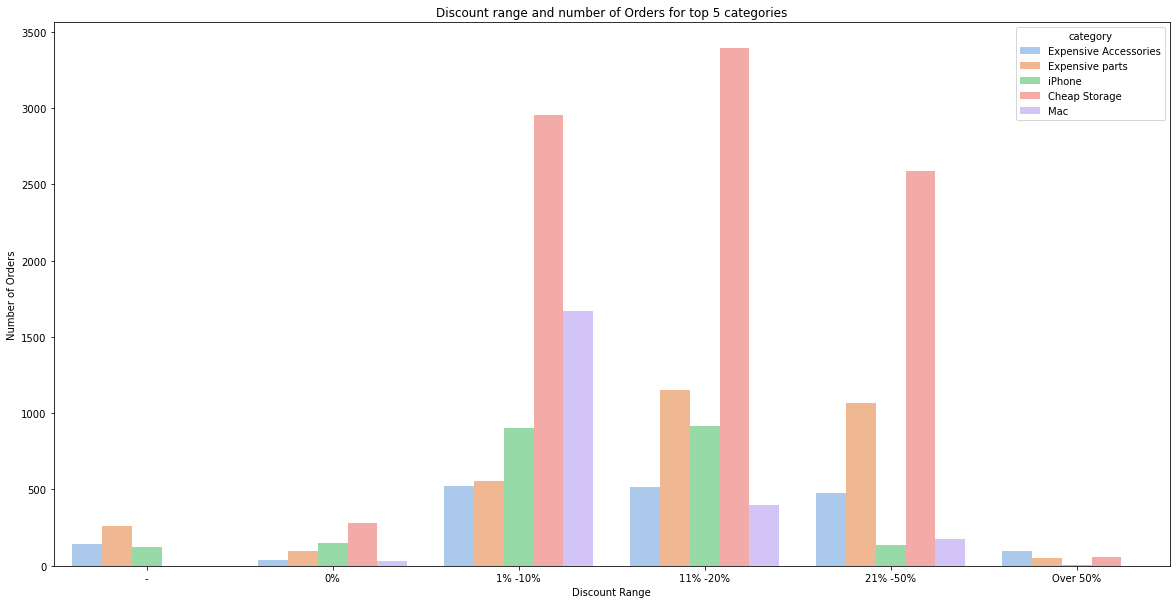

In [513]:
plt.subplots(figsize=(20, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_orders_top_5_categories, x='discount_range', y='id_order', hue='category', palette=colors)
plt.xlabel('Discount Range')
plt.ylabel('Number of Orders') 
plt.title('Discount range and number of Orders for top 5 categories') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

<h><strong>3.How many orders come from other categories? And in which discount range are?</strong></h>

In [514]:
discount_range_orders=orderlines_products_orders_sabrina.query('state=="Completed"')

In [515]:
discount_range_orders=discount_range_orders.query('year=="2017"')

In [516]:
discount_range_orders=discount_range_orders.groupby('discount_range').id_order.count().reset_index()

In [527]:
discount_range_orders

,discount_range,id_order
0,-,1384
1,0%,2829
2,1% -10%,12131
3,11% -20%,13530
4,21% -50%,15293
5,Over 50%,3749


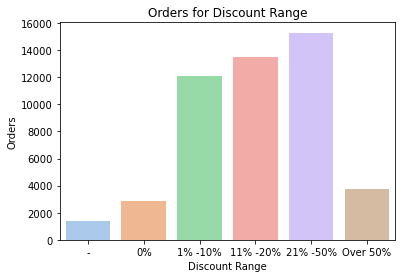

In [519]:
plt.plot(figsize=(12, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_orders, x='discount_range', y='id_order', palette=colors)
plt.title('Orders for Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Orders')
plt.show()

<h><strong>4.Which discount range segment brings more revenue?</strong></h>

In [520]:
discount_range_revenue=orderlines_products_orders_sabrina.query('state=="Completed"')

In [521]:
discount_range_revenue=discount_range_revenue.query('year=="2017"')

In [443]:
discount_range_revenue=discount_range_revenue.groupby('discount_range').revenue.sum().reset_index()

In [525]:
discount_range_revenue=discount_range_revenue.groupby('discount_range').revenue.sum().reset_index()

In [528]:
discount_range_revenue

,discount_range,revenue
0,-,0.00
1,0%,509889.06
2,1% -10%,6397706.66
3,11% -20%,3811091.47
4,21% -50%,2834047.40
5,Over 50%,338163.80


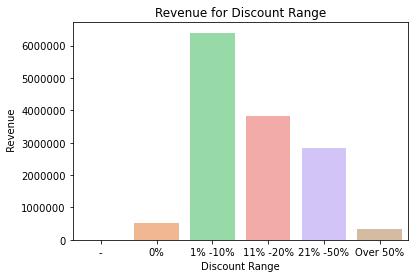

In [529]:
plt.plot(figsize=(20, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_revenue, x='discount_range', y='revenue', palette=colors)
plt.title('Revenue for Discount Range')
plt.xlabel('Discount Range')
plt.ylabel(' Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<h><strong>5.Is there a correlation between discount and Orders completed? </strong></h>

In [530]:
discount_range_orders_completed_correlation=orderlines_products_orders_sabrina.query('year=="2017"')

In [531]:
discount_range_orders_completed_correlation=discount_range_orders_completed_correlation.groupby(['discount_range','state']).id_order.count().reset_index()

In [532]:
discount_range_orders_completed_correlation

,discount_range,state,id_order
0,-,Cancelled,235
1,-,Completed,1384
2,-,Pending,567
3,-,Place Order,711
4,-,Shopping Basket,3642
5,0%,Cancelled,610
6,0%,Completed,2829
7,0%,Pending,1222
8,0%,Place Order,2349
9,0%,Shopping Basket,11868


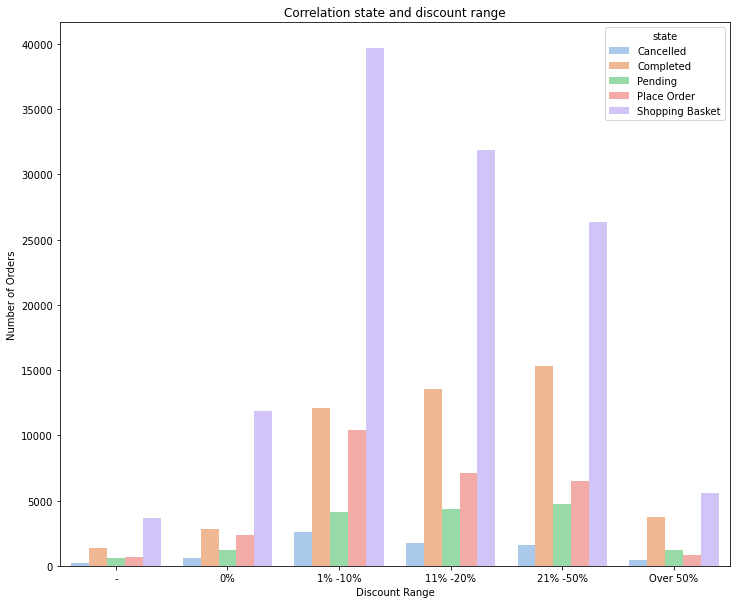

In [533]:
plt.subplots(figsize=(12, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_orders_completed_correlation,x='discount_range', y='id_order', hue='state',palette=colors)
plt.xlabel('Discount Range') 
plt.ylabel('Number of Orders') 
plt.title('Correlation state and discount range') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

<h><strong>6.Is there a correlation between discount and number of orders? </strong></h>